<a href="https://colab.research.google.com/github/damladmrk/AIBeginner/blob/main/YZA_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Logistic Regression**

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

In [8]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


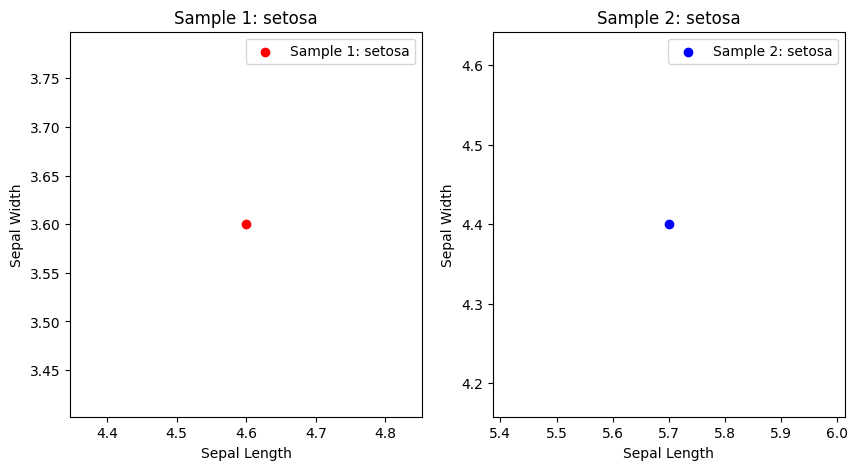

In [9]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Load the Iris dataset
iris = load_iris()

# Features (X_l) and Labels (Y_l)
X_l = iris.data  # Features
Y_l = iris.target  # Labels

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_l, Y_l, test_size=0.2, random_state=42)

# Visualization (for example, plotting the first two features)
img_size = 64  # This value is just for illustration, not used for actual visualization

plt.figure(figsize=(10, 5))

# Plot the first sample
plt.subplot(1, 2, 1)
plt.scatter(X_train[0, 0], X_train[0, 1], c='red', label=f'Sample 1: {iris.target_names[Y_train[0]]}')
plt.title(f'Sample 1: {iris.target_names[Y_train[0]]}')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# Plot the second sample
plt.subplot(1, 2, 2)
plt.scatter(X_train[1, 0], X_train[1, 1], c='blue', label=f'Sample 2: {iris.target_names[Y_train[1]]}')
plt.title(f'Sample 2: {iris.target_names[Y_train[1]]}')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

plt.show()

In [12]:
# Flatten the data for training and testing
# In this case, we have 4 features per sample, and no real "reshape" is needed as we don't have image-like 2D data
number_of_train = X_train.shape[0]  # Number of training samples
number_of_test = X_test.shape[0]  # Number of test samples
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1])  # Here, we just keep the same structure
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1])  # Same for the test set

# Print the shapes of the flattened data
print("X train flatten:", X_train_flatten.shape)
print("X test flatten:", X_test_flatten.shape)

X train flatten: (120, 4)
X test flatten: (30, 4)


In [20]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4, 120)
x test:  (4, 30)
y train:  (120,)
y test:  (30,)


In [13]:
# short description and example of definition (def)
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [14]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [15]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost

In [16]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [17]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In [18]:
 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 0.605208
Cost after iteration 10: -0.307260
Cost after iteration 20: -0.642259
Cost after iteration 30: -0.910438
Cost after iteration 40: -1.158461
Cost after iteration 50: -1.398036
Cost after iteration 60: -1.633384
Cost after iteration 70: -1.866366
Cost after iteration 80: -2.097920
Cost after iteration 90: -2.328568
Cost after iteration 100: -2.558624
Cost after iteration 110: -2.788283
Cost after iteration 120: -3.017672
Cost after iteration 130: -3.246876
Cost after iteration 140: -3.475953


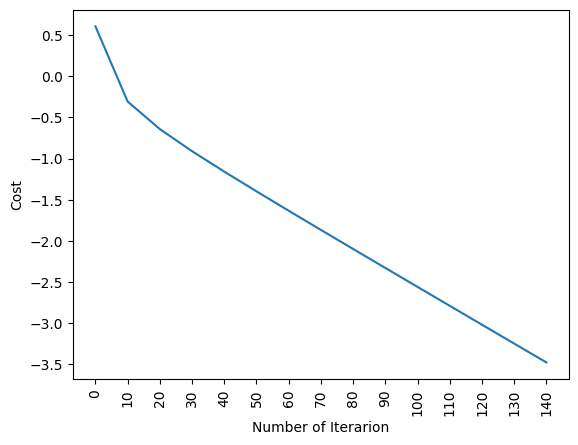

train accuracy: 34.16666666666667 %
test accuracy: 30.0 %


In [22]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

# **2 Layers ANN**

In [23]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [24]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [36]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[0]
    return cost

In [37]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [38]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}

    return parameters

In [39]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 81.639874
Cost after iteration 5: 76.407654
Cost after iteration 10: 71.387036
Cost after iteration 15: 66.690897
Cost after iteration 20: 61.725779


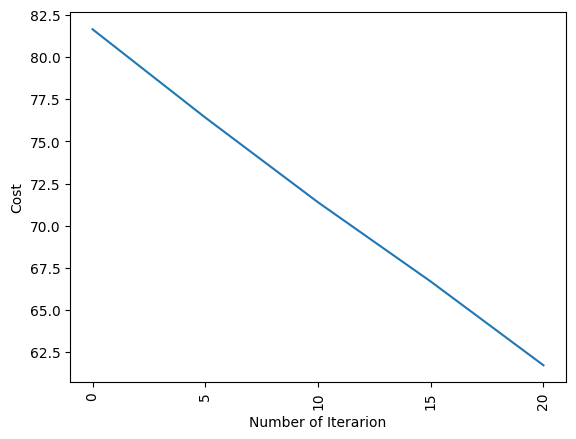

train accuracy: 67.5 %
test accuracy: 63.333333333333336 %


In [40]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)

        if i % 5 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()

    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=25)

# **Keras**

In [41]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [43]:
!pip install keras
!pip install scikit-learn

In [48]:
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras

In [51]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Build the ANN model
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=x_train.shape[1]))
    classifier.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

# Initialize classifier with KerasClassifier
classifier = KerasClassifier(model=build_classifier, epochs=10, batch_size=32)

# Perform manual k-fold cross-validation using StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

accuracies = []

for train_index, val_index in kfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model
    classifier.fit(x_train_fold, y_train_fold)

    # Evaluate the model
    accuracy = classifier.score(x_val_fold, y_val_fold)
    accuracies.append(accuracy)

# Calculate and display the mean and variance of the accuracies
mean = np.mean(accuracies)
variance = np.std(accuracies)

print(f"Accuracy mean: {mean}")
print(f"Accuracy variance: {variance}")



Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3625 - loss: 0.6926
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3313 - loss: 0.6907
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3508 - loss: 0.6885 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3391 - loss: 0.6875
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3469 - loss: 0.6849
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3469 - loss: 0.6825
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3430 - loss: 0.6803 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3898 - loss: 0.6784
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3586 - loss: 0.6752 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3234 - loss: 0.6739 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1797 - loss: 0.6929  
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20m

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Accuracy mean: 0.3333333333333333
Accuracy variance: 0.011785113019775776
